In [ ]:
# =======================
# 📌 Step 1: Install Dependencies
# =======================
!apt install tesseract-ocr
!pip install pymupdf pytesseract opencv-python pillow


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,431 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 124935 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
# =======================
# 📌 Step 2: Import Libraries
# =======================
import fitz  # PyMuPDF
import cv2
import pytesseract
import numpy as np
from PIL import Image


In [ ]:
# =======================
# 📌 Step 3: Load Scanned PDF
# =======================
# Upload "sample_mortgage_document.pdf" manually in Colab
from google.colab import files

uploaded = files.upload()
pdf_path = list(uploaded.keys())[0]  # Get uploaded file name

# Open the scanned mortgage document
doc = fitz.open(pdf_path)

Saving sample_mortgage_document.pdf to sample_mortgage_document.pdf


In [ ]:
# =======================
# 📌 Step 4: Try Extracting Text Without OCR (Will Fail)
# =======================
page = doc[0]
text = page.get_text("text")  # Normal text extraction
print("Extracted Text:", text)  # Expecting empty or incorrect output

Extracted Text: 


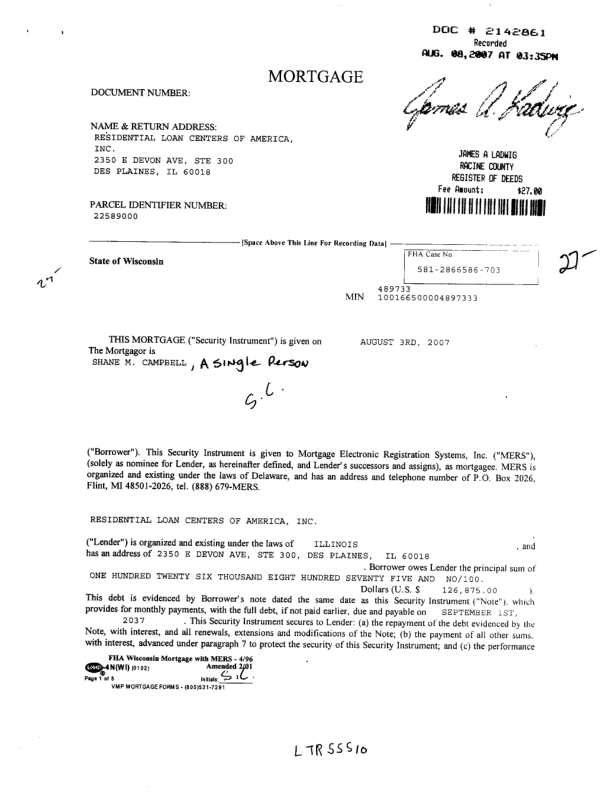

In [ ]:
# =======================
# 📌 Step 5: Convert PDF to Image for OCR
# =======================
pix = page.get_pixmap()
img = np.array(Image.frombytes("RGB", [pix.width, pix.height], pix.samples))
display(Image.fromarray(img))

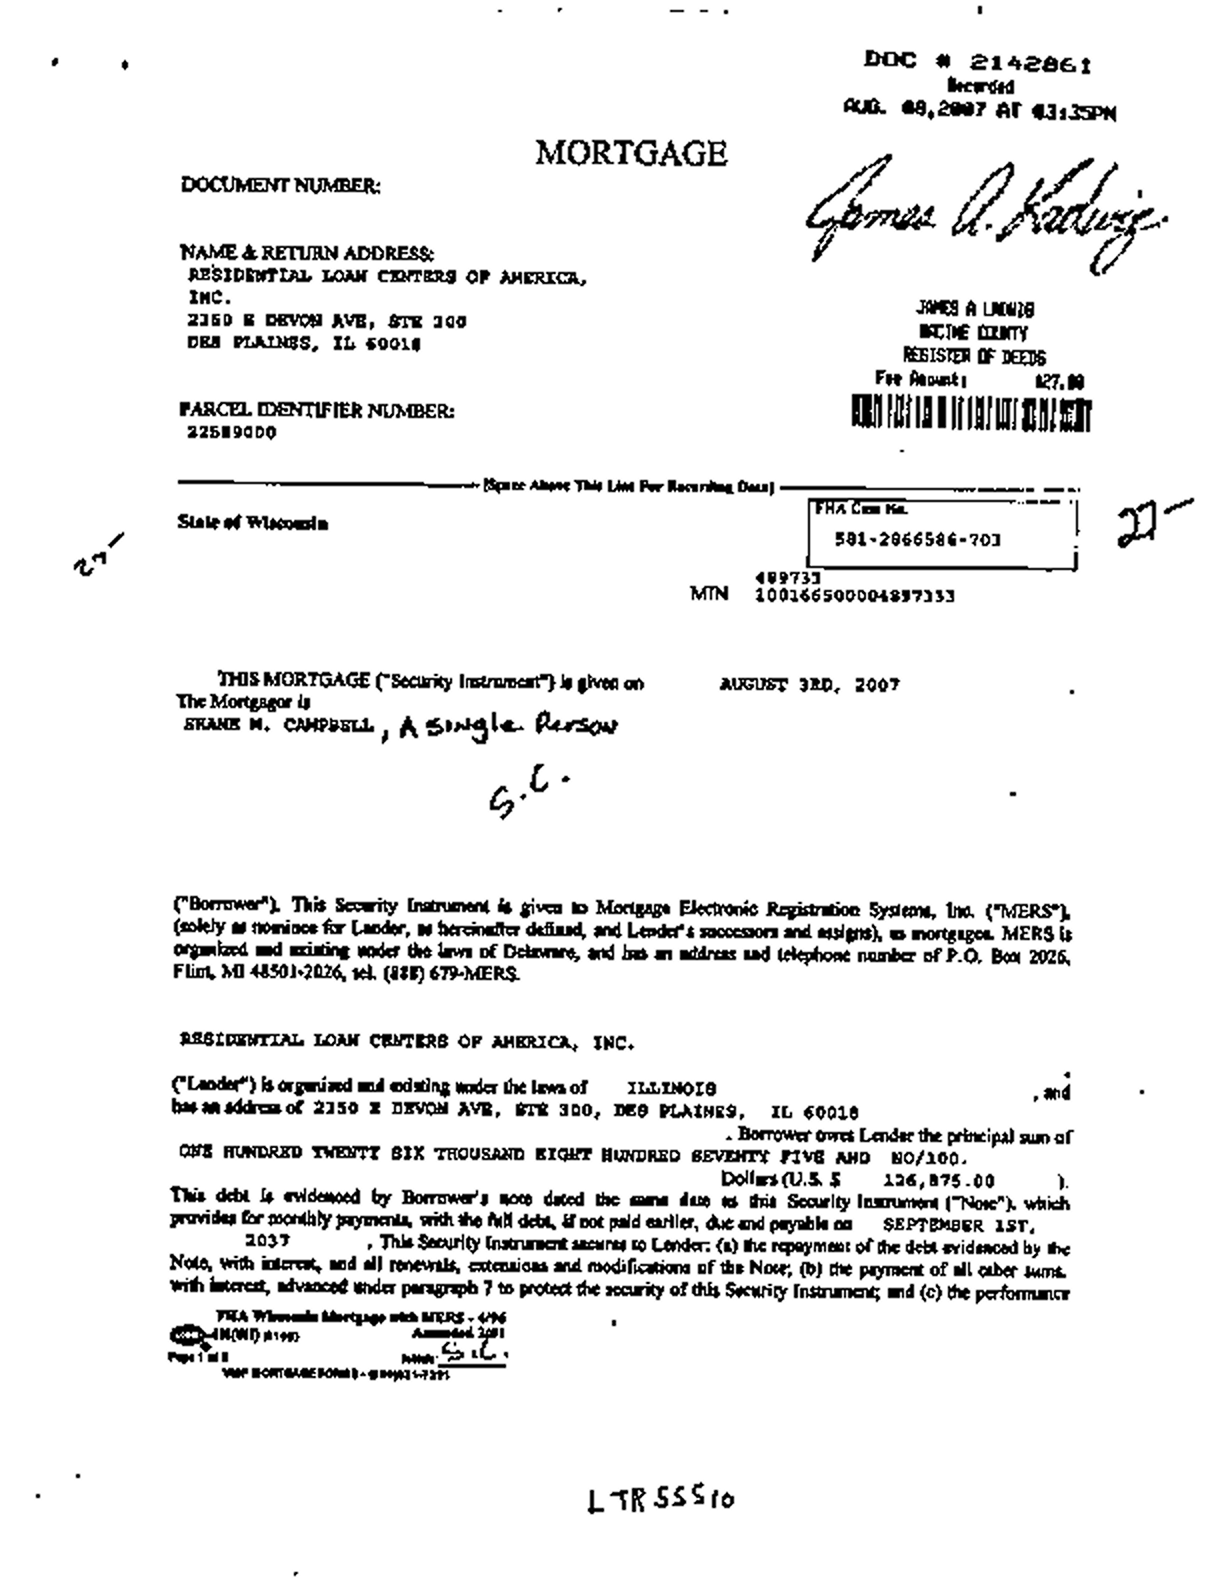

In [ ]:

# =======================
# 📌 Step 6: Preprocess Image for Better OCR Accuracy
# =======================

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Apply Adaptive Thresholding for contrast enhancement
gray = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

# Apply Bilateral Filtering to reduce noise while preserving edges
gray = cv2.bilateralFilter(gray, 9, 75, 75)

# Resize image for better OCR accuracy (Tesseract performs better on larger text)
scale_percent = 200  # Increase image size by 200%
width = int(gray.shape[1] * scale_percent / 100)
height = int(gray.shape[0] * scale_percent / 100)
gray = cv2.resize(gray, (width, height), interpolation=cv2.INTER_CUBIC)

# Show the preprocessed image
display(Image.fromarray(gray))


In [ ]:
# =======================
# 📌 Step 7.1: Perform OCR on the Image
# =======================
# Use optimized Tesseract OCR configurations
custom_config = r'--oem 3 -l eng'
ocr_text = pytesseract.image_to_string(gray, config=custom_config)


print("OCR Extracted Text:\n", ocr_text)

# =======================
# 📌 Step 7.2: Extract Bounding Boxes from OCR Output
# =======================

ocr_data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)

# Print first 5 extracted words with bounding boxes
for i in range(5):
    print(f"Word: {ocr_data['text'][i]}, BBox: ({ocr_data['left'][i]}, {ocr_data['top'][i]}, {ocr_data['width'][i]}, {ocr_data['height'][i]})")


OCR Extracted Text:
 BOC # 2142861
fecweed
FG. 08,2007 AT 43:35PN

MORTGAGE
DOCUMENT NUMBER: SO '

NAME & RETURN ADDRESS:

RESIDENTIAL LOAM CENTERG OF AMERICA,

rnc. OES A LCD
2150 B CEVOH AVE, STR 109 BUM trey
DEA PLAINGS, IL $0019 REBISTER OF DEEDS

Fee Paowts

since. DENTIER MER EVA A

— Hirai Alene This Litt Por Rocuritng Cian}

 

A Com Ma an | “
Stale of Wlocoee

391-2666586-701

409731
MIN 100186500004837233

THIS MORTGAGE (“Security Instrameat"} Je given on AUGUST 3BD, 2007
The Mortgagor is
SHAME M, CAMPDELL , A Single. Rersow
c- .

Go

(solely as twomince for Lander, wv hercinaiter defiad, and Lendet's saccemora and aisigts), as mortgagee. MERS ts
Orgmized md existing woder tet laws of Deleware, art! as an address aad telephone number of P.O, Bow 2026,
Flint, ¥4] 4850162026, s¢1, (GE) 679-MERS.

RESIOWYTIAL LOAW CENTERS OF AHERICA, INC,

CLander*’) fs organized and edsting wader the Laws of ILLINOIS rad
bat an sddrom of 2250 2 DEVON AVR, GIR 300, DEO PLAINES, IL 60018
+ Borrow

In [ ]:
# =======================
# 📌 Step 8: Post-OCR Processing & Extracting Key Information
# =======================

import re
import json

# 📌 Step 8.1: Preprocess OCR Text (Cleaning & Formatting)
ocr_text = " ".join(ocr_text.split())  # Remove extra spaces & newlines
ocr_text = re.sub(r'[^a-zA-Z0-9\s,.%-]', '', ocr_text)  # Remove special chars

# 📌 Step 8.2: Fix Common OCR Errors
ocr_text = re.sub(r'\bL0AN\b', 'LOAN', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\bM0RTGAGE\b', 'MORTGAGE', ocr_text, flags=re.IGNORECASE)
ocr_text = re.sub(r'\b1NTEREST\b', 'INTEREST', ocr_text, flags=re.IGNORECASE)


print("Final Cleaned OCR Text:\n", ocr_text)


NameError: name 'ocr_text' is not defined

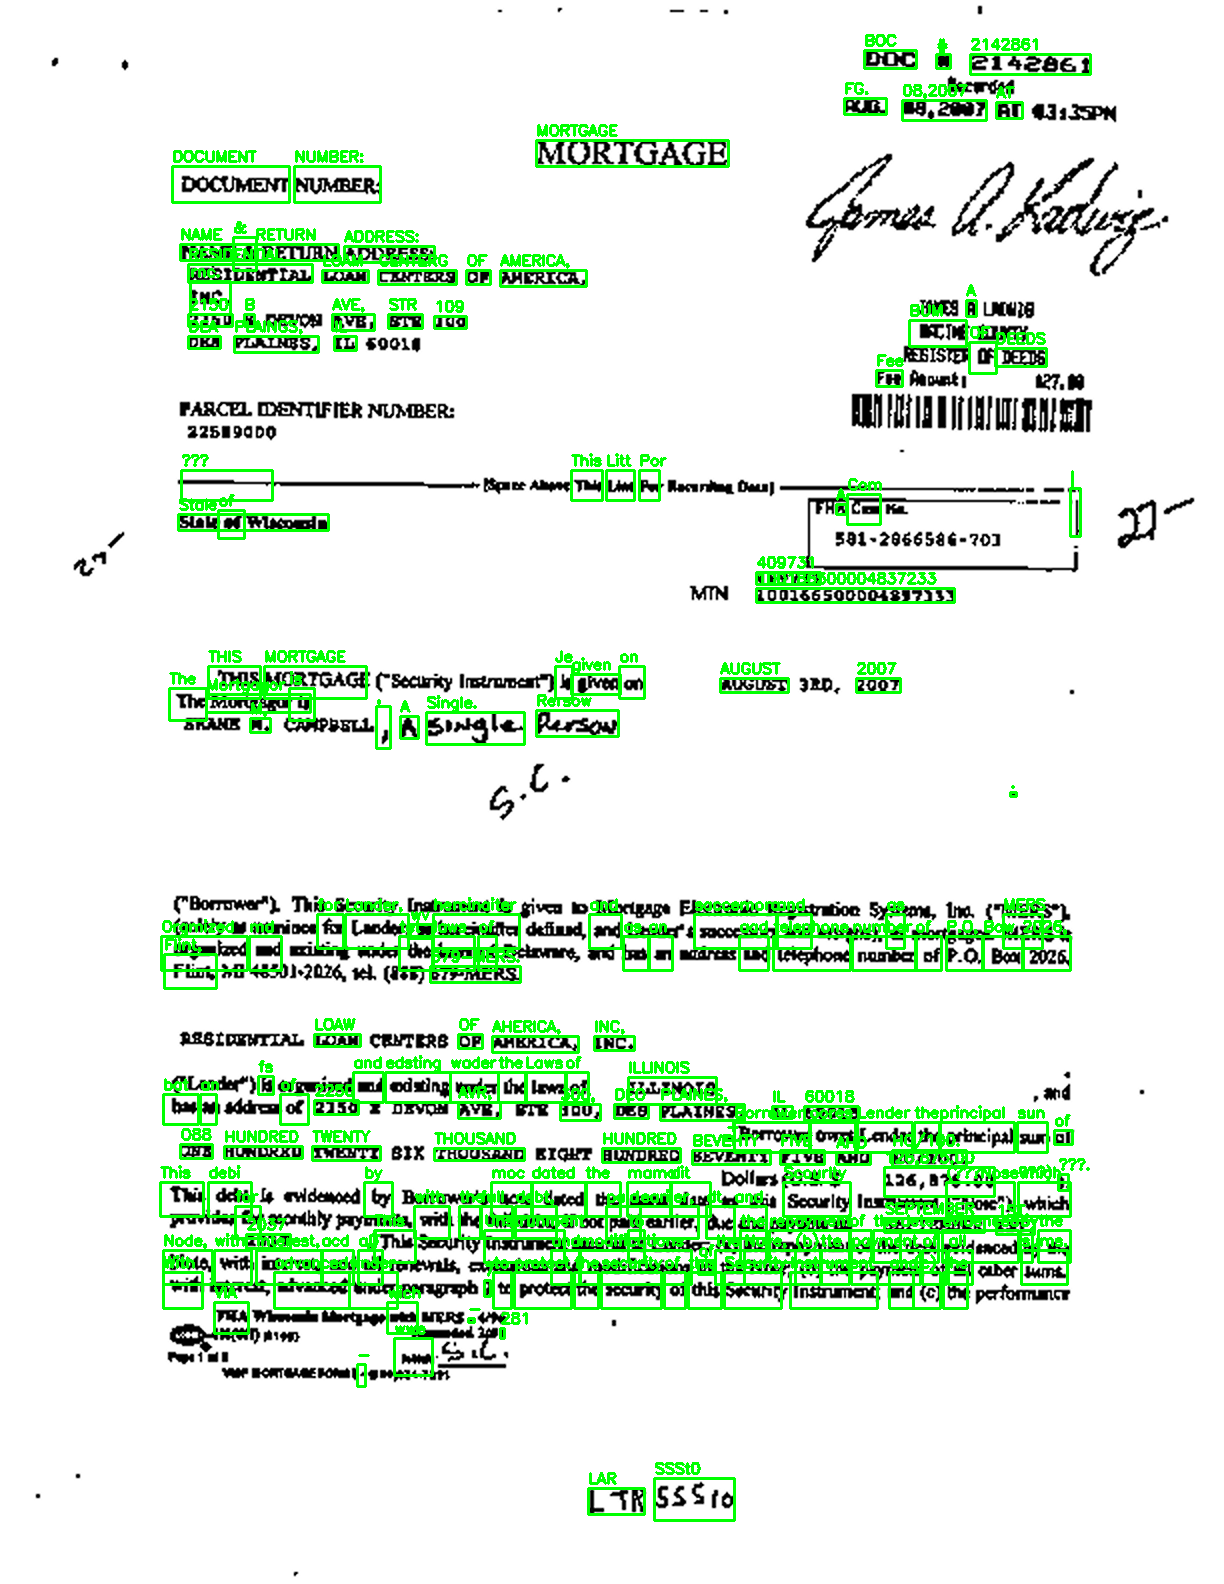

In [ ]:
import cv2
from PIL import Image

# Convert image to OpenCV BGR format
img_bgr = cv2.cvtColor(gray, cv2.COLOR_RGB2BGR)

# Get OpenCV image height for correct y-coordinate transformation
page_height = gray.shape[0]

# Define confidence threshold (ignore low-confidence words)
confidence_threshold = 40

# 📌 Step 9.1: Loop through Extracted OCR Words & Draw Bounding Boxes
for i in range(len(ocr_data["text"])):
    word = ocr_data["text"][i].strip()
    x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]
    conf = int(ocr_data["conf"][i])  # Convert confidence to int

    # Ignore empty words & low-confidence OCR text
    if not word or conf < confidence_threshold:
        continue

    # Fix y-coordinate to match OpenCV's top-left origin
    #y = page_height - y

    # Draw bounding box
    cv2.rectangle(img_bgr, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img_bgr, word, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# 📌 Step 9.2: Convert Back to RGB & Display the Image
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_rgb))





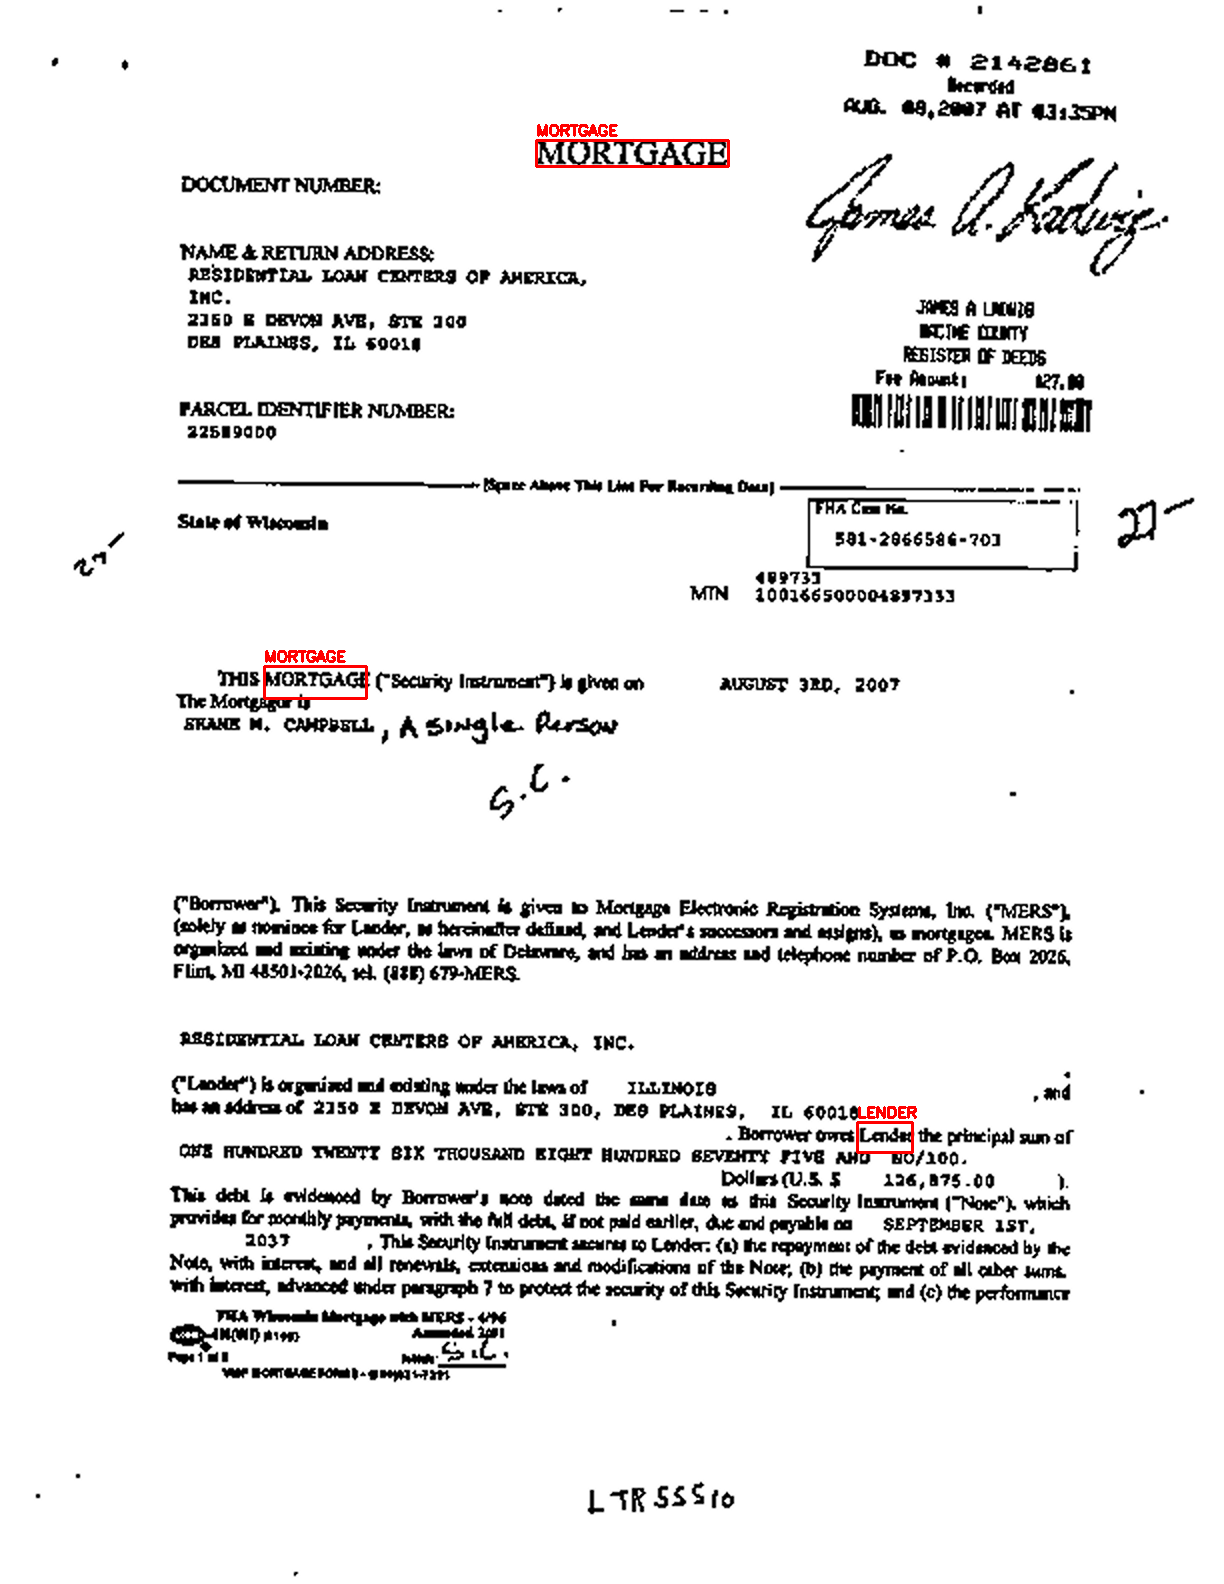

In [ ]:
# =======================
# 📌 Step 10: Draw Bounding Boxes on Relevant Key Fields from Mortgage Document
# =======================

import cv2

# Convert image to OpenCV BGR format
img_bgr = cv2.cvtColor(gray, cv2.COLOR_RGB2BGR)

# Define key fields dynamically based on document content
key_fields = ["MORTGAGE", "NOTE", "LENDER", "PROPERTY ADDRESS", "DATE", "SIGNATURE"]

# Loop through extracted OCR words
for i in range(len(ocr_data["text"])):
    word = ocr_data["text"][i].strip().upper()  # Convert to uppercase for better matching
    x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]

    if word in key_fields:  # Highlight only key fields found in the document
        cv2.rectangle(img_bgr, (x, y), (x + w, y + h), (0, 0, 255), 2)  # Red bounding box
        cv2.putText(img_bgr, word, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

# Convert back to RGB for display
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
display(Image.fromarray(img_rgb))

In [ ]:
import json

# Initialize an empty dictionary to store extracted key field data
extracted_data = {}

# Loop through detected words to extract key fields
for i in range(len(ocr_data["text"])):
    word = ocr_data["text"][i].strip().upper()
    x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]

    if word in key_fields:
        extracted_data[word] = {
            "text": word,
            "bounding_box": [x, y, w, h]
        }

# Convert extracted data into JSON format
json_output = json.dumps(extracted_data, indent=4)

# Print structured JSON output
print(json_output)


{
    "MORTGAGE": {
        "text": "MORTGAGE",
        "bounding_box": [
            264,
            666,
            102,
            32
        ]
    },
    "LENDER": {
        "text": "LENDER",
        "bounding_box": [
            857,
            1122,
            55,
            30
        ]
    }
}
